# Python 3.8 For Finance #

## Part 1: Intro and Getting Stock Price Data ##

> https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ

You'll need the following resources:


- numpy
- Pandas
- Pandas_datareader
- Matplotlib
- Beautifulsoup4
- Scikit-learn / sklearn


In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2019,12,31)

df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.head(10))
print(df.tail(10))


                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2010-06-29  25.000000  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.420000  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.920000  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.100000  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.000000  15.830000  20.000000  16.110001   6866900  16.110001
2010-07-07  16.629999  14.980000  16.400000  15.800000   6921700  15.800000
2010-07-08  17.520000  15.570000  16.139999  17.459999   7711400  17.459999
2010-07-09  17.900000  16.549999  17.580000  17.400000   4050600  17.400000
2010-07-12  18.070000  17.000000  17.950001  17.049999   2202500  17.049999
2010-07-13  18.639999  16.900000  17.389999  18.139999   2680100  18.139999
                  High         Low        Open       Close    Volume  \
Date            

## Part 2: Handling Data and Graphing ##

> https://www.youtube.com/watch?v=0e-lsstqCdY&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=2

### Create .csv ###

In [10]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2019,12,31)

df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv') # Create .csv

print(df.head(5)) 

# you can also print(df[['Open', 'High']].head()) to get specific output.

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


### Read .csv ###

In [9]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

df = pd.read_csv('tsla.csv') # pd can read from json, sql, excel...
print(df.head(5))

         Date   High        Low       Open      Close    Volume  Adj Close
0  2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
1  2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2  2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
3  2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
4  2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


We can remove the first column like this:

In [11]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
print(df.head(5))

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


### Generate Graph ###

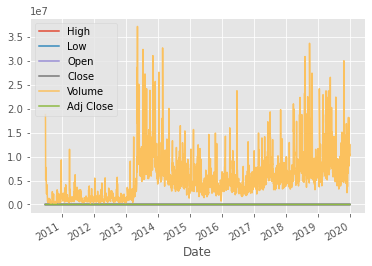

In [12]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df.plot()
plt.show()

### Graphing Graph of a Particular Column ###

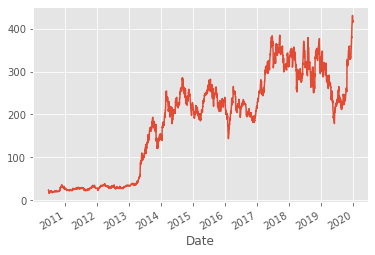

In [14]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df['Adj Close'].plot()
plt.show()

## Part 3: Basic Stock Data Manipulation ##

> https://www.youtube.com/watch?v=QAkOnV1-lIg&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=3

### Creating a New Column for 100 Moving Average ###

In [15]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df['100ma'] = df['Adj Close'].rolling(window=100).mean()  # Create a new column for 100 moving average

# Note this will only become applicable after the first 100 days, hence we are look at the "df.tail()".
print(df.tail())

                  High         Low        Open       Close    Volume  \
Date                                                                   
2019-12-24  425.470001  412.690002  418.359985  425.250000   8054700   
2019-12-26  433.480011  426.350006  427.910004  430.940002  10633900   
2019-12-27  435.309998  426.109985  435.000000  430.380005   9945700   
2019-12-30  429.000000  409.260010  428.790009  414.700012  12586400   
2019-12-31  421.290009  402.079987  405.000000  418.329987  10285700   

             Adj Close     100ma  
Date                              
2019-12-24  425.250000  283.5870  
2019-12-26  430.940002  285.6132  
2019-12-27  430.380005  287.6095  
2019-12-30  414.700012  289.4223  
2019-12-31  418.329987  291.2226  


You can remove the the rows that don't contain 100ma by adding the additional command below:

In [16]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df['100ma'] = df['Adj Close'].rolling(window=100).mean()  # Create a new column for 100 moving average
df.dropna(inplace=True)  # This command will now remove the rows that do not contain a 100 moving average, i.e. the firts 100 rows

print(df.head())


                 High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2010-11-17  30.750000  28.610001  30.200001  29.490000   750000  29.490000   
2010-11-18  30.740000  28.920000  30.670000  29.889999   956100  29.889999   
2010-11-19  31.370001  29.700001  30.160000  30.990000  1150500  30.990000   
2010-11-22  33.450001  31.500000  31.570000  33.400002  1529700  33.400002   
2010-11-23  35.680000  32.189999  33.290001  34.570000  1577800  34.570000   

              100ma  
Date                 
2010-11-17  20.9879  
2010-11-18  21.0479  
2010-11-19  21.1195  
2010-11-22  21.2339  
2010-11-23  21.3876  


### Multiple Graphs With Multiple Subplots ###

             High        Low       Open      Close    Volume  Adj Close  100ma
Date                                                                          
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999    NaN
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000    NaN
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999    NaN
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001    NaN
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001    NaN


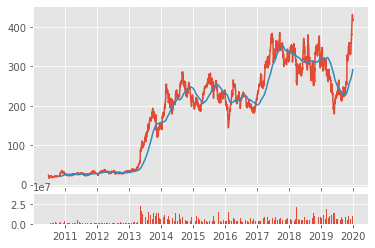

In [20]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100).mean()  # Create a new column for 100 moving average

print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)  # (Grid size, Starting point, rowspan, colspan)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)  # (Grid size, Starting point, rowspan, colspan, share x)

ax1.plot(df.index, df['Adj Close'])  # (x, y)
ax1.plot(df.index, df['100ma'])  # (x, y)
ax2.bar(df.index, df['Volume'])  # (x, y)

plt.show()

## Part 4: More stock manipulations ##

> https://www.youtube.com/watch?v=19yyasfGLhk&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=4

### Candelstick Graph and Resampling data: ###

C:\Users\chris\AppData\Local\Programs\Python\Python38-32\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


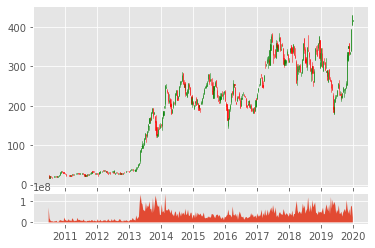

In [18]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader as web

style.use('ggplot')


df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
# df['100ma'] = df['Adj Close'].rolling(window=100).mean()  # Create a new column for 100 moving average

# ohlc = Open High Low Close
df_ohlc = df['Adj Close'].resample('10D').ohlc()  # Resample 10 days, can also do week year ...
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)  # mdates maked date to some weird 7090834 number that matplotlib will use

print(df_ohlc.head())


ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)  # (Grid size, Starting point, rowspan, colspan)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)  # (Grid size, Starting point, rowspan, colspan, share x)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup= 'g') # (Axe's, Data, width, color)
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()


## Part 5: Automating getting the S&P 500 list ##

> https://www.youtube.com/watch?v=C--57BP79EM&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=5

S&P 500 is *generally* the top 500 companies by market cap.

Market Cap = Value of company = (num of outstanding shares * price)

How to get all *tickers* from the S&P 500:

In [19]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,features="lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers, f)

    print(tickers)
    return tickers


save_sp500_tickers()

['MMM\n', 'ABT\n', 'ABBV\n', 'ABMD\n', 'ACN\n', 'ATVI\n', 'ADBE\n', 'AMD\n', 'AAP\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALXN\n', 'ALGN\n', 'ALLE\n', 'AGN\n', 'ADS\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'ANTM\n', 'AON\n', 'AOS\n', 'APA\n', 'AIV\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ADM\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'ADP\n', 'AZO\n', 'AVB\n', 'AVY\n', 'BKR\n', 'BLL\n', 'BAC\n', 'BK\n', 'BAX\n', 'BDX\n', 'BRK.B\n', 'BBY\n', 'BIIB\n', 'BLK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BF.B\n', 'CHRW\n', 'COG\n', 'CDNS\n', 'CPB\n', 'COF\n', 'CPRI\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'CNC\n', 'CNP\n', 'CTL\n', 'CERN\n', 'CF\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', 'CI\n', 'CI

['MMM\n',
 'ABT\n',
 'ABBV\n',
 'ABMD\n',
 'ACN\n',
 'ATVI\n',
 'ADBE\n',
 'AMD\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALXN\n',
 'ALGN\n',
 'ALLE\n',
 'AGN\n',
 'ADS\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'ANTM\n',
 'AON\n',
 'AOS\n',
 'APA\n',
 'AIV\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ADM\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'ADP\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BLL\n',
 'BAC\n',
 'BK\n',
 'BAX\n',
 'BDX\n',
 'BRK.B\n',
 'BBY\n',
 'BIIB\n',
 'BLK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BF.B\n',
 'CHRW\n',
 'COG\n',
 'CDNS\n',
 'CPB\n',
 'COF\n',
 'CPRI\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC\n',
 'CNP\

## Part 6: Getting all company pricing data in the S&P 500 ##

> https://www.youtube.com/watch?v=baCAFPHb1o4&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=6

Note: The code in the video is a bit out dated. In the next link you can find the updated version, which is the same depicted  below.
>https://stackoverflow.com/questions/54854276/no-data-fetched-web-datareader-panda

Now to get all the data for the S&P 500 companies:

__Don't run code in notebook to test, it can take quite a long time to get all the data!__

In [22]:
import bs4 as bs
import datetime as dt
import os
from tqdm.auto import tqdm
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import pickle
import requests
# import fix_yahoo_finance as yf
import yfinance as yf

yf.pdr_override


def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,features="lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)

    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers, f)

    print(tickers)
    return tickers


# save_sp500_tickers() # Saves S&P 500 data.

def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers() # Saves S&P 500 data.
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000,1,1)
    end = dt.datetime.now()

    for ticker in tqdm(tickers, 'get_data_from_yahoo Loading...'):
        # print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            # df = web.DataReader(ticker, 'yahoo', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            # df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


# save_sp500_tickers()
# get_data_from_yahoo()

print("I've commented out the function to stop it from accedently running")

I've commented out the function to stop it from accedently running


## Part 7: Combining S&P 500 into one DataFrame ##

> https://www.youtube.com/watch?v=j0zW_KXyQJ4&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=7

The *compile_data()* function below, creates a .csv file that contains all the data for the s&p500.

In [ ]:
import bs4 as bs
import datetime as dt
import os
from tqdm.auto import tqdm
import pandas as pd
from pandas_datareader import data as pdr
import pickle
import requests



def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,features="lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)

    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers, f)

    print(tickers)
    return tickers


def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers() # Saves S&P 500 data.
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000,1,1)
    end = dt.datetime.now()

    for ticker in tqdm(tickers, 'get_data_from_yahoo Loading...'):
        # print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            # df = web.DataReader(ticker, 'yahoo', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            # df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in tqdm(enumerate(tickers), 'Compile Data'):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


# save_sp500_tickers()
# get_data_from_yahoo()
# compile_data()

print("I've commented out the function to stop it from accedently running")

## Part 8: S&P 500 company correlation table ##

> https://www.youtube.com/watch?v=PxUzcDJBEZ4&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=8

The *visualize_data()* function below will draw a correlation table of the entire S&P500. It's super awesome but can take some time to run.

In [ ]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
from tqdm.auto import tqdm
import pandas as pd
from pandas_datareader import data as pdr
import pickle
import requests

style.use('ggplot')

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,features="lxml")
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)

    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers, f)

    print(tickers)
    return tickers


def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers() # Saves S&P 500 data.
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000,1,1)
    end = dt.datetime.now()

    for ticker in tqdm(tickers, 'get_data_from_yahoo Loading...'):
        # print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            # df = web.DataReader(ticker, 'yahoo', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            # df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in tqdm(enumerate(tickers), 'Compile Data'):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


def graph_company(tick):
    df = pd.read_csv('sp500_joined_closes.csv')
    df[tick].plot()
    plt.show()

def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    # df['AAPL'].plot()
    # plt.show()
    df_corr = df.corr() # This will calculate the correlation of all the data in our file
    print(df_corr.head())


    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

# save_sp500_tickers()
# get_data_from_yahoo()
# compile_data()
# graph_company('AAPL')
# visualize_data()
print("I've commented out the function to stop it from accedently running")

## Part 9: Preprocessing data for Machine Learning ##

> https://www.youtube.com/watch?v=Z-5wNWgRJpk&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=9

The following code will not produce any output. Rather it builds up to the next part.

In [ ]:
import numpy as np
import pandas as pd
import pickle

def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days + 1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
     
    df.fillna(0, inplace=True)
    return tickers, df


## Part 10: Creating machine learning target function ##

> https://www.youtube.com/watch?v=0IHy7J44Xxo&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=10

Again, The following code will not produce any output. Rather it builds up to the next part.

In [ ]:
import numpy as np
import pandas as pd
import pickle

def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days + 1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
     
    df.fillna(0, inplace=True)
    return tickers, df

def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02  # 0.02 = 2%
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0


## Part 11: Creating labels for Machine Learning##

> https://www.youtube.com/watch?v=zPp80YM2v7k&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=11

Again, The following code will not produce any output. Rather it builds up to the next part.

In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
import pickle

def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days + 1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
     
    df.fillna(0, inplace=True)
    return tickers, df

def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02  # 0.02 = 2%
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

def exstract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)]
                                              ))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X, y, df

# exstract_featuresets('AAPL')

## Part 12: Machine learning ##

> https://www.youtube.com/watch?v=W4kqEvGI4Lg&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=12



In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days + 1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
     
    df.fillna(0, inplace=True)
    return tickers, df

def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02  # 0.02 = 2%
    for col in cols:
        if col > 0.028:
            return 1
        if col < -0.027:
            return -1
    return 0

def exstract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)]
                                              ))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X, y, df

def do_ml(ticker):
    X, y, df = exstract_featuresets(ticker)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # clf = neighbors.KNeighborsClassifier()
    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))

    return confidence

do_ml('AAPL')

## Part 13: Algorithmic Trading with Python and Quantopian p.1 ##

> https://www.youtube.com/watch?v=GlV_QO5B2eU&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=13

## Part 14: Orders and Leverage - Algorithmic Trading with Python and Quantopian p. 2 ##

> https://www.youtube.com/watch?v=H5LLJDJ3jTI&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=14